In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\marpaka pradeep sai\\Downloads\\50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.rename(columns={'R&D Spend' : "RDS", 
                   'Administration' : 'admin', 
                  "Marketing Spend" : "MKTS"}, inplace = True)
df

,RDS,admin,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   admin   50 non-null     float64
 2   MKTS    50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isnull().sum()

RDS       0
admin     0
MKTS      0
State     0
Profit    0
dtype: int64

In [6]:
df.describe()

,RDS,admin,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df1 = df.drop("State", axis = 1)
df1

,RDS,admin,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [8]:
df1.corr()

,RDS,admin,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


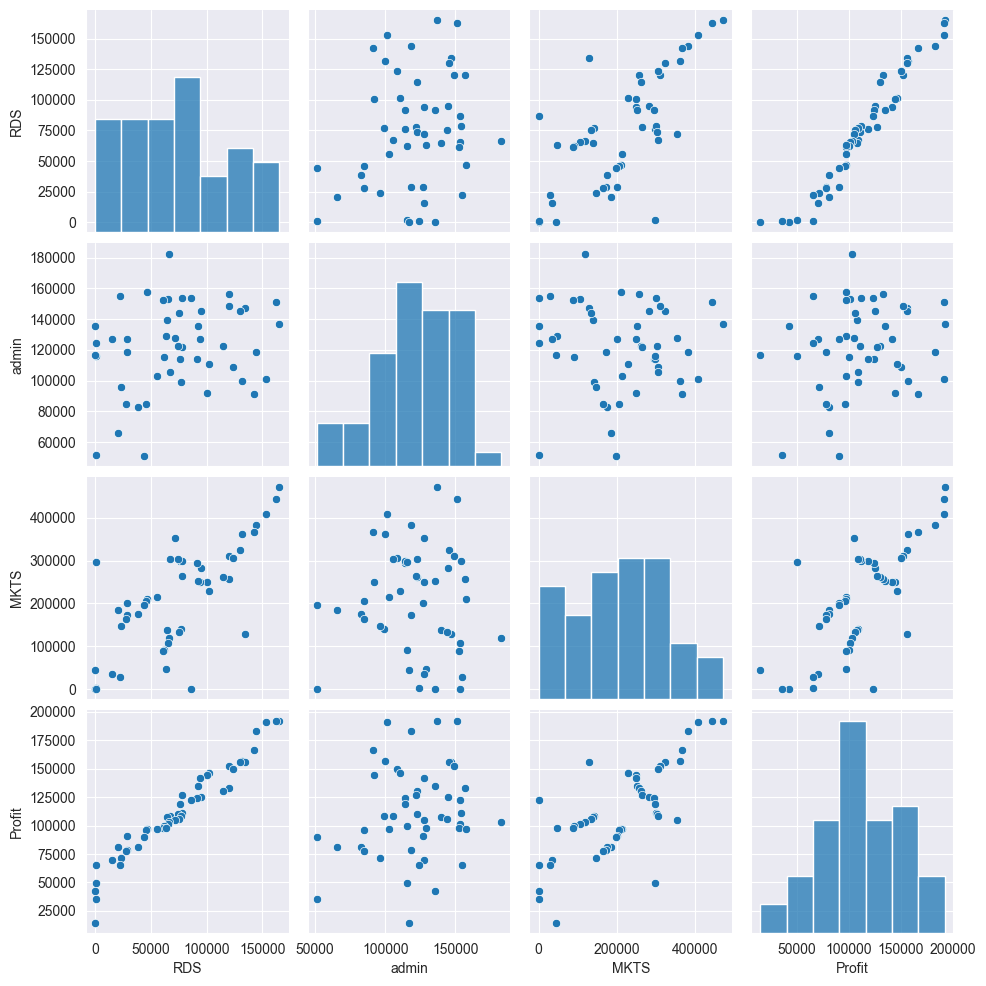

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

In [10]:
df[df.duplicated()].sum()

RDS       0.0
admin     0.0
MKTS      0.0
State       0
Profit    0.0
dtype: object

# No Duplicate Values

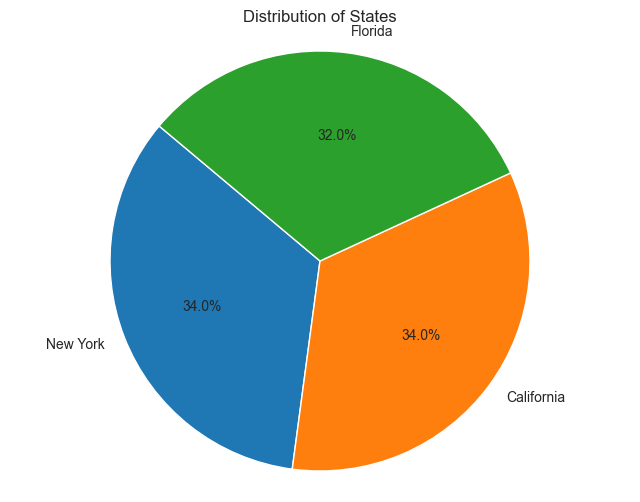

In [11]:
state_counts = df['State'].value_counts()

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of States')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


<Axes: >

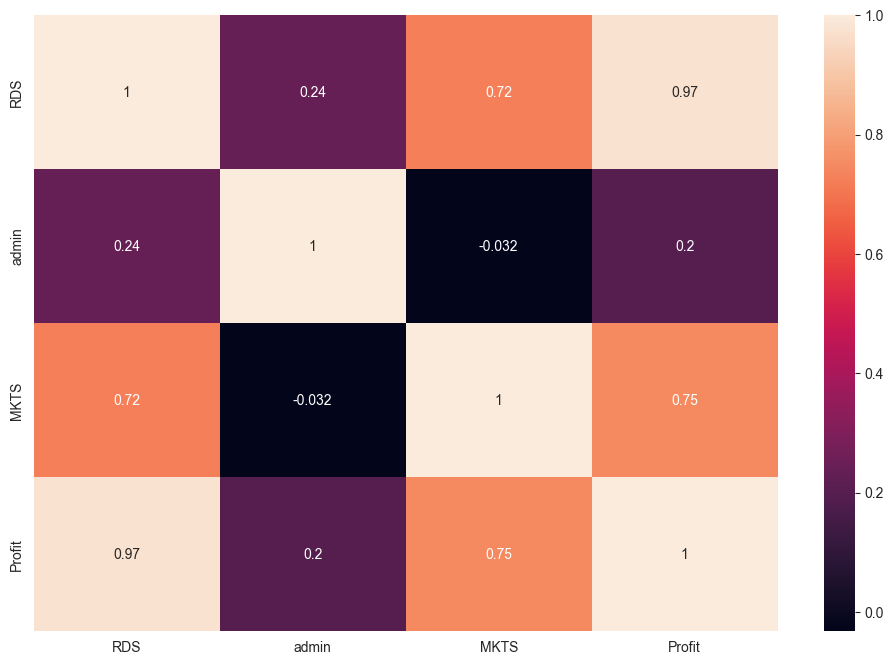

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df1.corr(),
    annot=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

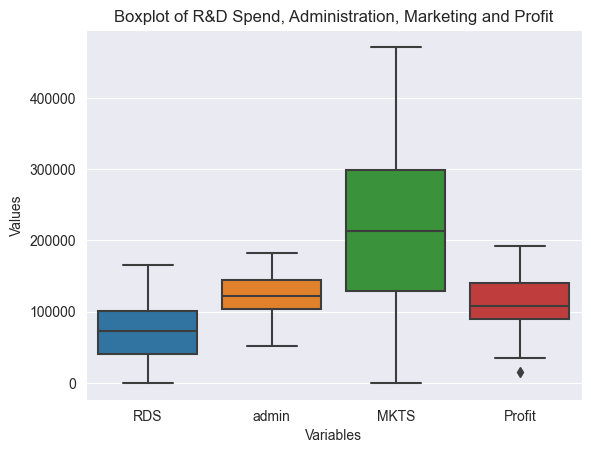

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with columns 'R&D spend', 'Administration', 'marketing', 'Profit'
# Replace 'data' with your actual DataFrame name

# Selecting columns for boxplot
columns_to_plot = ['RDS', 'admin', 'MKTS', 'Profit']

# Creating boxplot
sns.boxplot(data=df1[columns_to_plot])
plt.title('Boxplot of R&D Spend, Administration, Marketing and Profit')
plt.xlabel('Variables')
plt.ylabel('Values') 
plt.show()



# There are no Outliers in our Independent Variable and our Dependent variable has one outlier

## Finding the outliers

In [14]:
Q1 = np.quantile(df.Profit,0.25)
Q3 = np.quantile(df.Profit,0.75)
med = np.median(df.Profit)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_bound,'\n' 'Lower Whisker=', lower_bound)

First Quantile= 90138.9025 
Second Quantile= 107978.19 
Third Quantile= 139765.97749999998 
Inter-Quartile Range= 49627.07499999998 
Upper Whisker= 214206.58999999997 
Lower Whisker= 15698.290000000023


In [15]:
Outliers = df.Profit[(df.Profit <= lower_bound) | (df.Profit >= upper_bound)]
print('The outlier in the boxplot:',Outliers)

The outlier in the boxplot: 49    14681.4
Name: Profit, dtype: float64


In [16]:
display(df[df.index.isin([49])],df.head())

,RDS,admin,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


,RDS,admin,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Transforming the profit variable to eliminate the outliers

C:\Users\marpaka pradeep sai\AppData\Local\Temp\ipykernel_25544\2002227934.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


{'whiskers': [<matplotlib.lines.Line2D at 0x1ca47b08e50>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca48730b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca47aff810>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca487307d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca47b53450>],
 'means': []}

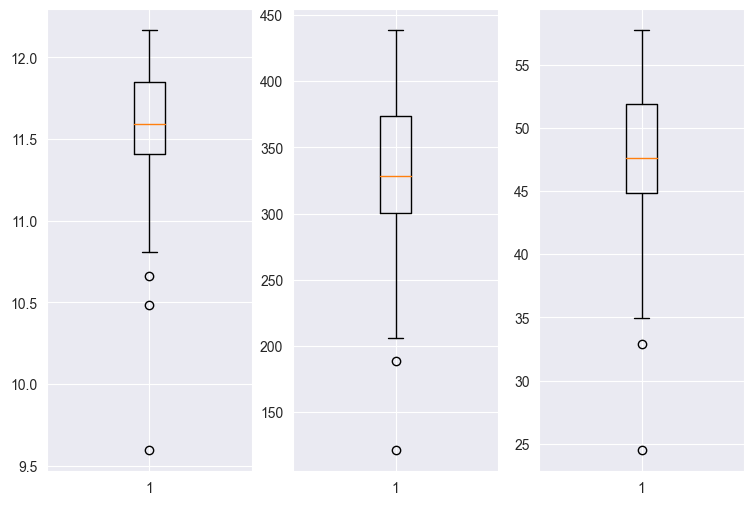

In [17]:
plt.subplots(figsize = (9,6))
plt.subplot(131)
plt.boxplot(np.log(df['Profit']))
plt.subplot(132)
plt.boxplot(np.sqrt(df['Profit']))
plt.subplot(133)
plt.boxplot(np.cbrt(df['Profit']))

### As we can see that even after transforming the Profit variable, the presence of outliers persists, and interestingly, their frequency seems to have risen

# Before handling Outliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for this case

In [18]:
raw_model = smf.ols("Profit~RDS+admin+MKTS", data = df).fit()
raw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           4.53e-30
Time:                        14:27:52   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
raw_model.rsquared, raw_model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

## To tackle the outlier in the profit, let's explore the option of using Median imputation

In [20]:
df['Profit'].median()

107978.19

Text(0.5, 1.0, 'Profit before Median imputation')

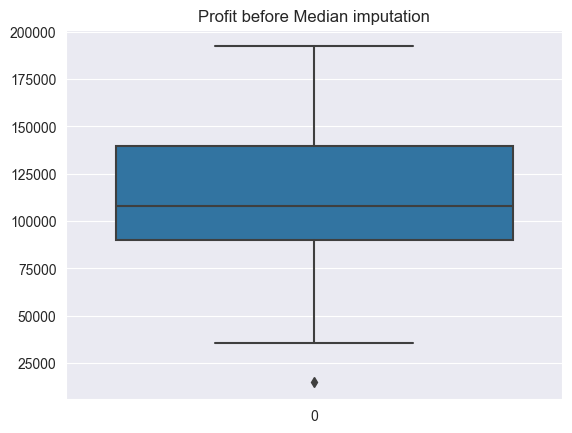

In [21]:
df2=df.copy()
sns.boxplot(df['Profit'])
plt.title('Profit before Median imputation')

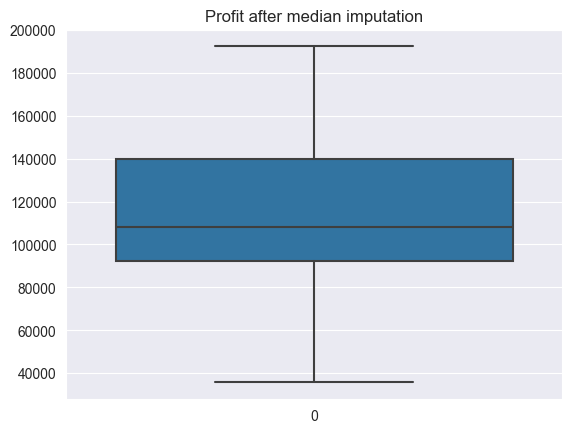

In [22]:
for i in df2['Profit']:
    q1 = np.quantile(df.Profit,0.25)
    q3 = np.quantile(df.Profit,0.75)
    med = np.median(df.Profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Profit'] = df2['Profit'].replace(i, np.median(df2['Profit']))
sns.boxplot(df2['Profit'])
plt.title('Profit after median imputation')
plt.show()

## Model performance after Median imputation

In [23]:
after_median_imputation_model = smf.ols("Profit~RDS+admin+MKTS", data = df2).fit()
after_median_imputation_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     172.3
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           5.06e-25
Time:                        14:27:52   Log-Likelihood:                -534.81
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      46   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.594e+04   7936.330      7.049      0.000       4e+04    7.19e+04
RDS            0.7472      0.055     13.707      0.000       0.638       0.857
admin         -0.0149      0.062     -0.242      0.810      -0.139       0.109
MKTS           0.0221      0.020      1.112      0.272      -0.018       0.062
==============================================================================
Omnibus:                       45.356   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.667
Skew:                           2.221   Prob(JB):                     1.82e-51
Kurtosis:                      12.614   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Finding rsquared values
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj

(0.9182958360807372, 0.91296730365122)

### As we can see that after median imputation the model performance is reduced.

# 

## To tackle the outlier in the profit, let's explore the option of using Mean imputation

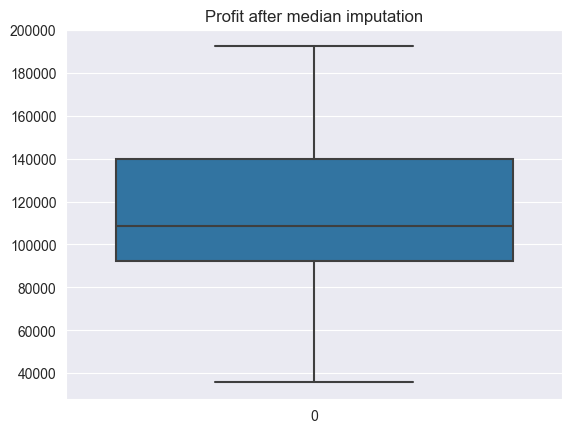

In [25]:
df3 = df.copy()
for i in df3['Profit']:
    q1 = np.quantile(df3.Profit,0.25)
    q3 = np.quantile(df3.Profit,0.75)
    med = np.median(df3.Profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df3['Profit'] = df3['Profit'].replace(i, np.mean(df3['Profit']))
sns.boxplot(df3['Profit'])
plt.title('Profit after median imputation')
plt.show()

## Model Performance after Mean imputation

In [26]:
after_mean_imputation_model = smf.ols("Profit~RDS+admin+MKTS", data = df3).fit()
after_mean_imputation_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     158.8
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           2.82e-24
Time:                        14:27:53   Log-Likelihood:                -536.67
No. Observations:                  50   AIC:                             1081.
Df Residuals:                      46   BIC:                             1089.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.619e+04   8236.731      6.822      0.000    3.96e+04    7.28e+04
RDS            0.7447      0.057     13.162      0.000       0.631       0.859
admin         -0.0144      0.064     -0.226      0.823      -0.143       0.114
MKTS           0.0219      0.021      1.061      0.294      -0.020       0.063
==============================================================================
Omnibus:                       50.346   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.669
Skew:                           2.466   Prob(JB):                     1.55e-67
Kurtosis:                      14.107   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
after_mean_imputation_model.rsquared, after_mean_imputation_model.rsquared_adj

(0.9119537155310937, 0.9062115665439912)

## As we can see even after resorting to Mean imputation, the Model's performance did not exihibit enhancement; rather, it witnessed a decline

### The best thing we can do is now to remove the outlier and see the results

In [28]:
df4=df.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

Text(0.5, 1.0, 'Profit after removing outliers')

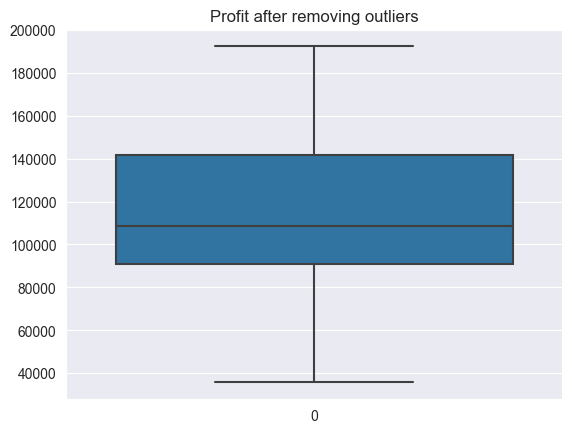

In [29]:
drop_outliers(df4, 'Profit')
sns.boxplot(df4.Profit)
plt.title('Profit after removing outliers')

## Let's test our data in model and compare the R-squared with and without imputation data models

In [30]:
removed_outlier_model = smf.ols("Profit~RDS+admin+MKTS", data = df4).fit()
removed_outlier_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           8.85e-32
Time:                        14:27:53   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
MKTS           0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# Finding rsquared values
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

## As we can see that there is a slight increment in the model performance after removing the outlier observations from the data as compared to the performance of raw_model 

### Hence we are using oultier removed data to build our model

# Preparing a model

In [32]:
modeldf4 = smf.ols('Profit ~ RDS + admin + MKTS', data = df4).fit()
modeldf4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           8.85e-32
Time:                        14:27:53   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
MKTS           0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#Coefficients
modeldf4.params

Intercept    52382.439251
RDS              0.783002
admin           -0.022201
MKTS             0.025234
dtype: float64

In [34]:
#p-Values
print(modeldf4.pvalues)

Intercept    2.960000e-12
RDS          1.971077e-24
admin        6.070728e-01
MKTS         7.458443e-02
dtype: float64


# Simple Linear Regression Models

In [35]:
slr_rds=smf.ols('Profit ~ RDS',data = df4).fit()  
# p-Values
print(slr_rds.pvalues)

Intercept    2.221695e-27
RDS          7.555104e-34
dtype: float64


In [36]:
slr_admin=smf.ols('Profit ~ admin',data = df4).fit()  
# p-Values
print(slr_admin.pvalues)

Intercept    0.001618
admin        0.155918
dtype: float64


In [37]:
slr_mkts=smf.ols('Profit ~ MKTS',data = df4).fit()  
# p-Values
print(slr_mkts.pvalues)

Intercept    5.905020e-11
MKTS         1.304853e-09
dtype: float64


In [38]:
mlr_am=smf.ols('Profit ~ admin+MKTS',data = df4).fit()  
# p-Values
print(mlr_am.pvalues)

Intercept    1.472650e-01
admin        1.572324e-02
MKTS         2.695219e-10
dtype: float64


In [39]:
mlr_ar=smf.ols('Profit ~ admin+RDS',data = df4).fit()  
# p-Values
print(mlr_ar.pvalues)

Intercept    1.210032e-14
admin        2.728844e-01
RDS          5.451979e-33
dtype: float64


### P value = 0.2728 > 0.05 
### we can see here that Administration + R&D Spend are insignificant when combined

In [40]:
mlr_rm=smf.ols('Profit ~ RDS+MKTS',data = df4).fit()  
# p-Values
print(mlr_rm.pvalues)

Intercept    1.970460e-25
RDS          3.628510e-26
MKTS         4.084443e-02
dtype: float64


In [41]:
mlr_rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           3.74e-33
Time:                        14:27:53   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RDS            0.7754      0.035     22.136      0.000       0.705       0.846
MKTS           0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 

# Calculating VIF

In [42]:
rsq_rds = smf.ols('RDS ~ admin + MKTS ',data=df4).fit().rsquared  
vif_rds = 1/(1-rsq_rds)

rsq_admin = smf.ols('admin ~ RDS + MKTS ',data=df4).fit().rsquared  
vif_admin = 1/(1-rsq_admin)

rsq_mkts = smf.ols('MKTS ~ RDS + admin  ',data=df4).fit().rsquared  
vif_mkts = 1/(1-rsq_mkts)

d1 = {'Variables' : ['RDS', 'admin', 'MKTS'], 'VIF' : [vif_rds, vif_admin, vif_mkts]}
vif_df = pd.DataFrame(d1)
vif_df

,Variables,VIF
0,RDS,2.377754
1,admin,1.175172
2,MKTS,2.239957


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

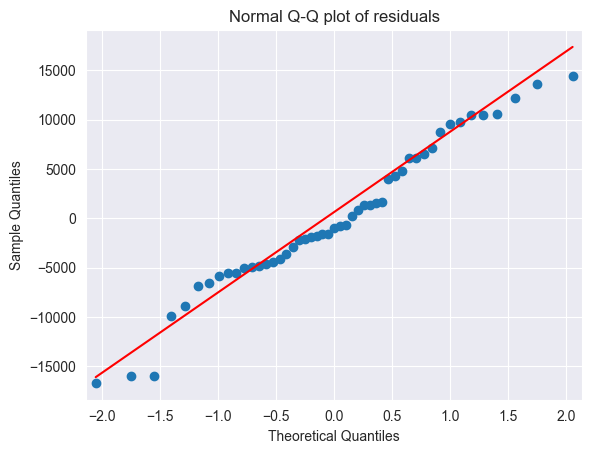

In [43]:
import statsmodels.api as sm
qqplot=sm.qqplot(modeldf4.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [44]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

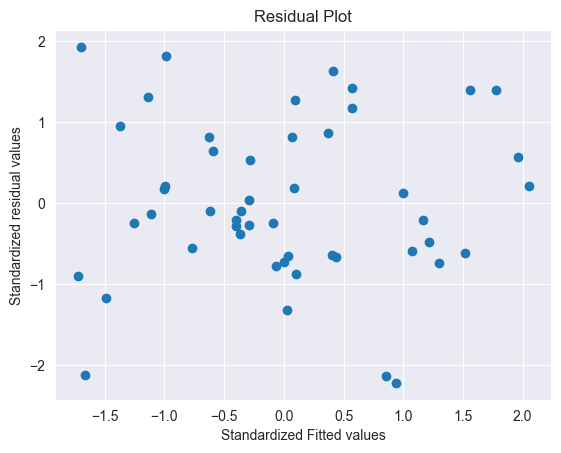

In [45]:
plt.scatter(get_standardized_values(modeldf4.fittedvalues),
            get_standardized_values(modeldf4.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual vs Regressor

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


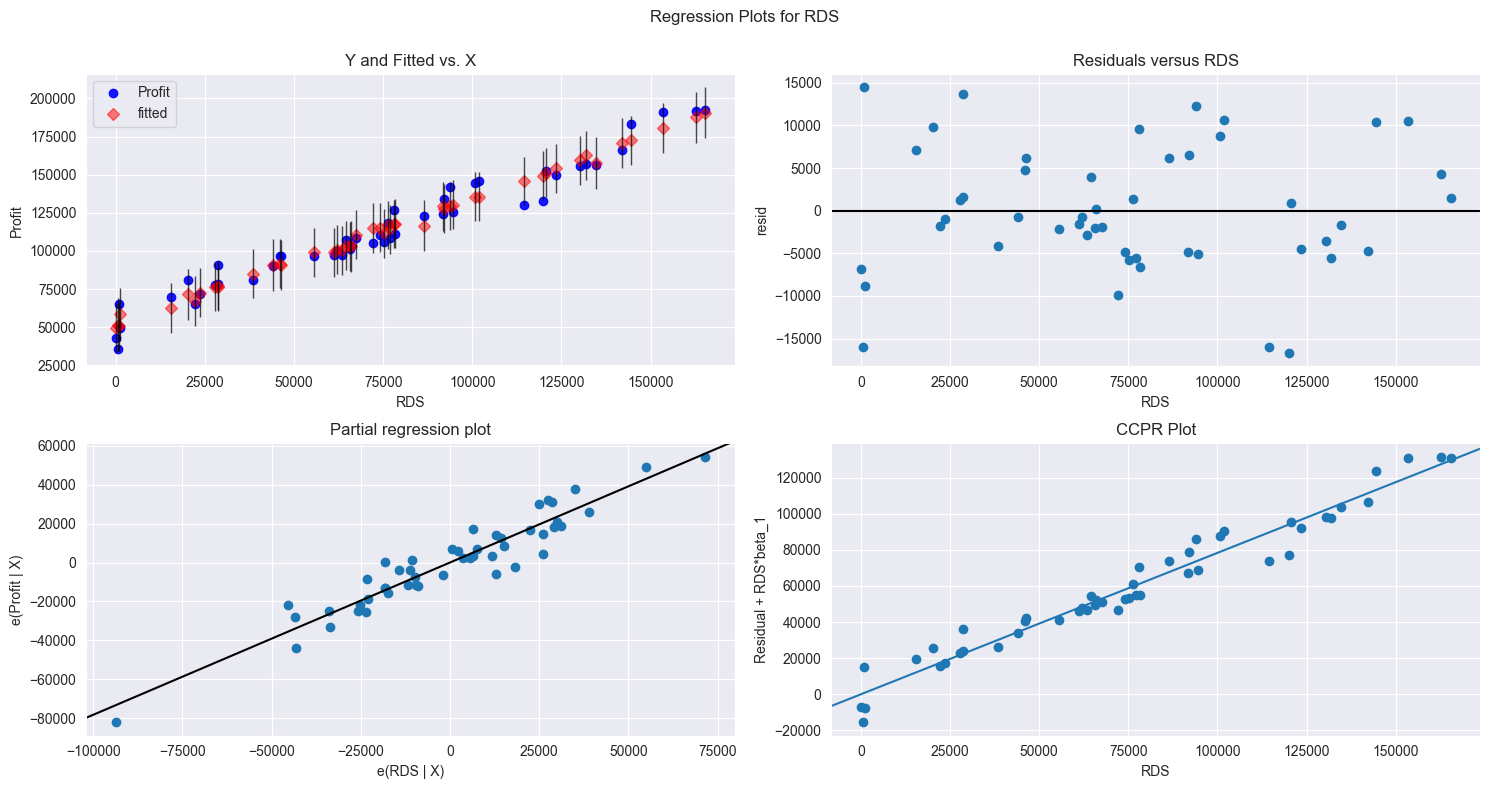

In [46]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(modeldf4, "RDS", fig=fig)
plt.show()

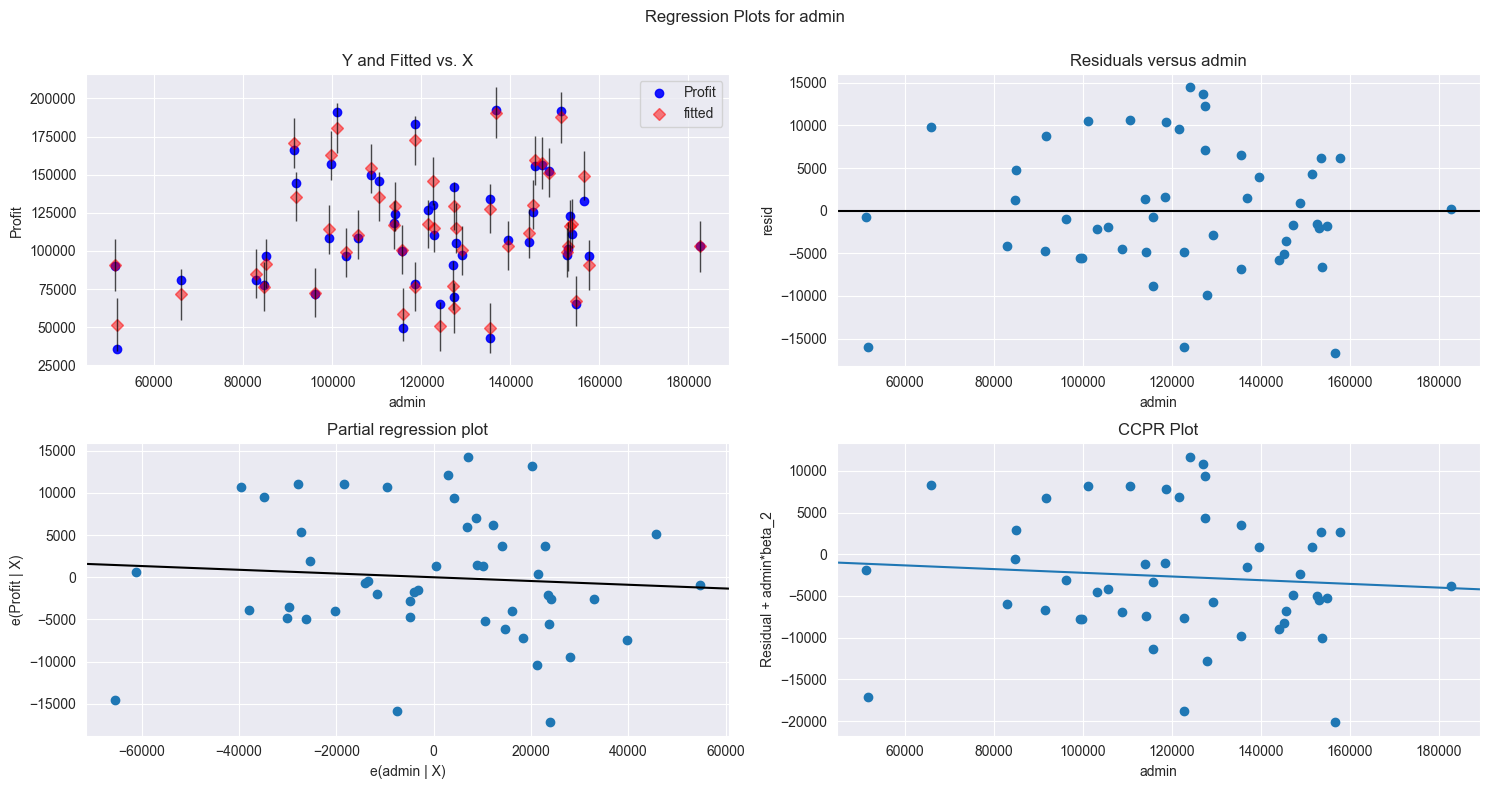

In [47]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(modeldf4, "admin", fig=fig)
plt.show()

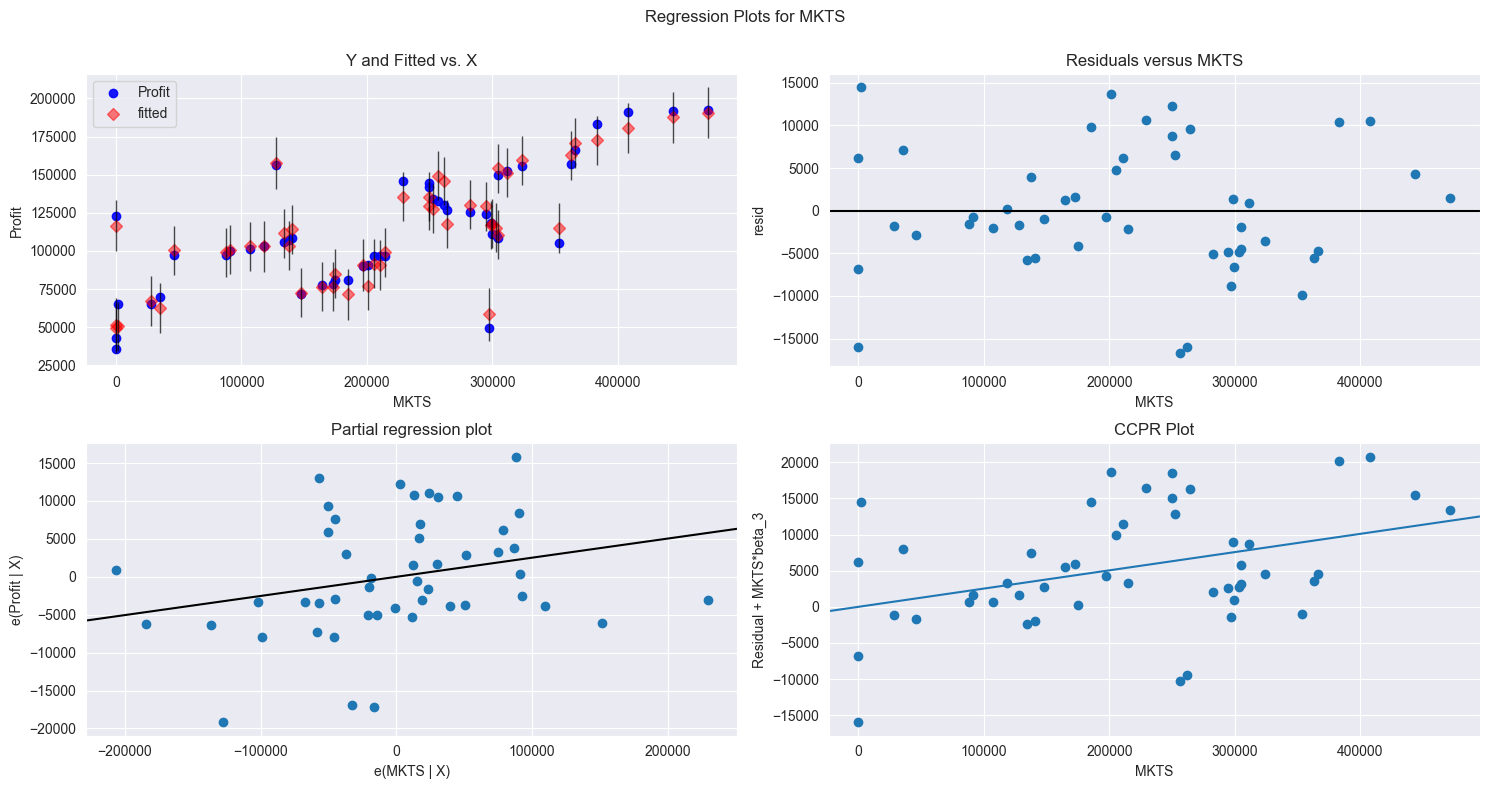

In [48]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(modeldf4, "MKTS", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

# Cook's Distance

In [49]:
model_influence = modeldf4.get_influence()
(c, _) = model_influence.cooks_distance

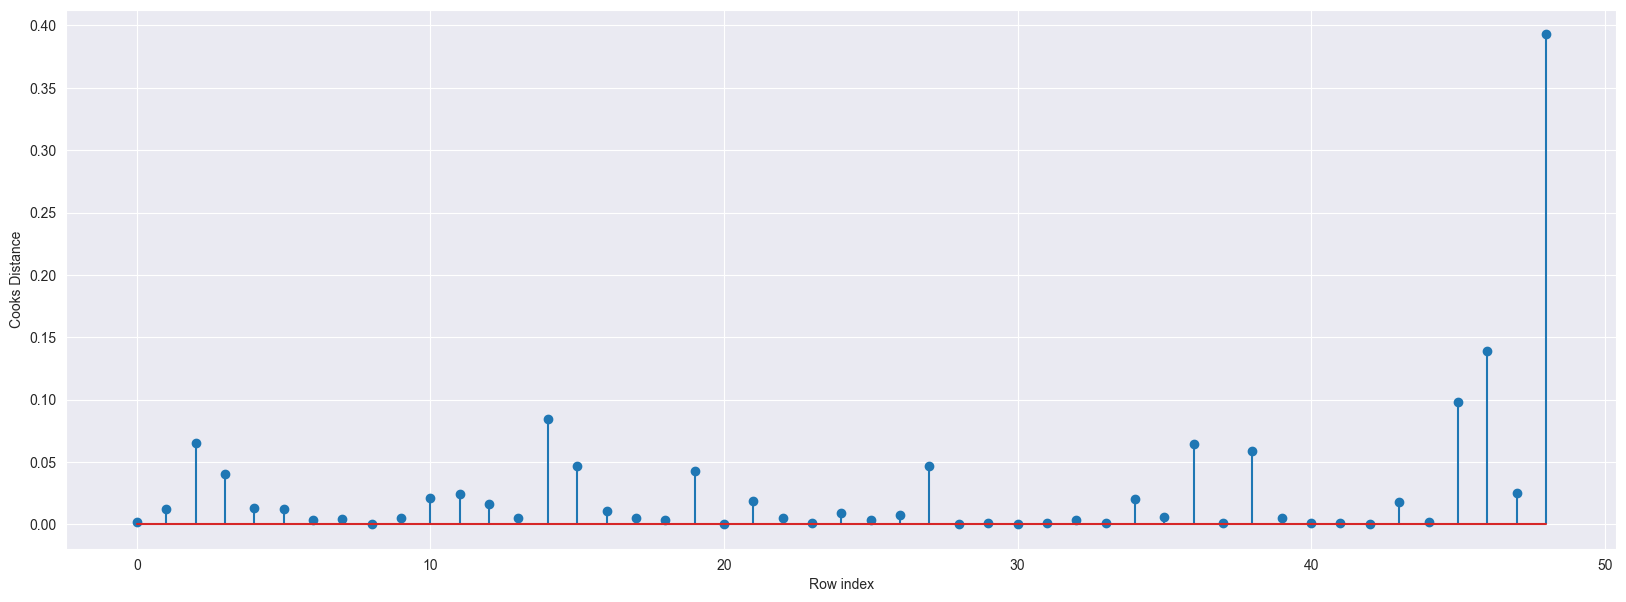

In [50]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [51]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(48, 0.39274420556321443)

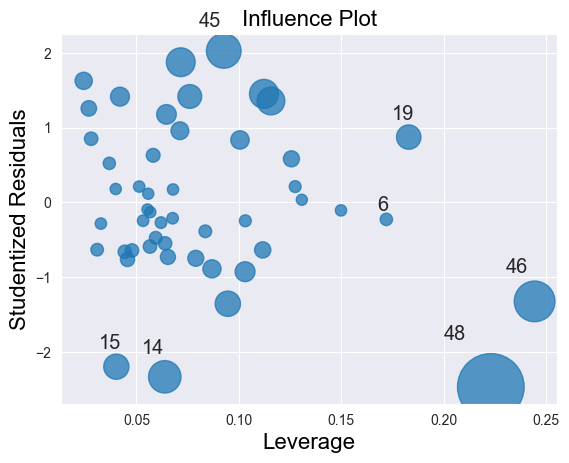

In [52]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(modeldf4)
plt.show()

In [53]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k = df4.shape[1]
n = df4.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36734693877551017

## From the above plot it is evident that there are no outliers in our data as all the values are less than leverage_cuttoff

In [54]:
#Build the model on the new data
final1= smf.ols('Profit ~ RDS + admin + MKTS',data = df4).fit()
final1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           8.85e-32
Time:                        14:28:01   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
MKTS           0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
final2 = smf.ols('Profit ~ RDS + admin ',data = df4).fit()
final2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     530.6
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           1.69e-32
Time:                        14:28:02   Log-Likelihood:                -508.03
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      46   BIC:                             1028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.682e+04   5105.017     11.131      0.000    4.65e+04    6.71e+04
RDS            0.8349      0.026     31.847      0.000       0.782       0.888
admin         -0.0464      0.042     -1.110      0.273      -0.131       0.038
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.245
Skew:                          -0.173   Prob(JB):                        0.885
Kurtosis:                       2.972   Cond. No.                     6.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
final3 = smf.ols('Profit ~ RDS + MKTS',data = df4).fit()
final3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           3.74e-33
Time:                        14:28:02   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RDS            0.7754      0.035     22.136      0.000       0.705       0.846
MKTS           0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## we can see that the administration has no effect on our profit variable

In [57]:
final4 = smf.ols('Profit ~ admin + MKTS',data = df4).fit()
final4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     34.66
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           6.59e-10
Time:                        14:28:02   Log-Likelihood:                -563.45
No. Observations:                  49   AIC:                             1133.
Df Residuals:                      46   BIC:                             1139.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.519e+04   1.71e+04      1.474      0.147   -9208.231    5.96e+04
admin          0.3152      0.126      2.508      0.016       0.062       0.568
MKTS           0.2356      0.029      8.027      0.000       0.177       0.295
==============================================================================
Omnibus:                        6.637   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                7.219
Skew:                          -0.454   Prob(JB):                       0.0271
Kurtosis:                       4.646   Cond. No.                     1.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
raw_model.rsquared

0.9507459940683246

In [59]:
final_model = smf.ols('Profit ~ RDS + MKTS', data = df4).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           3.74e-33
Time:                        14:28:02   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RDS            0.7754      0.035     22.136      0.000       0.705       0.846
MKTS           0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
final_model.rsquared

0.9610856807456628

# Model Predictions

In [63]:
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
new_data

,RDS,ADMS,MKTS
0,70000,90000,140000


In [64]:
final_model.predict(new_data)

0    107904.511796
dtype: float64

In [68]:
Profit_pred = final_model.predict(df4)
Profit_pred

0     190942.726927
1     188043.924520
2     179957.312472
3     172246.416164
4     170022.687457
5     161999.405410
6     157669.178690
7     159705.298181
8     151804.380605
9     153787.521922
10    135096.466868
11    134699.049858
12    129422.677987
13    128049.202655
14    149827.450777
15    145769.611357
16    117530.489091
17    130936.300519
18    129020.306206
19    116793.710748
20    117108.281313
21    118793.642939
22    115484.209637
23    110513.437292
24    113382.099441
25    103711.697086
26    111873.132740
27    115389.649335
28    104243.190309
29    103595.167960
30    100355.932697
31     99610.626757
32    100216.309933
33     98705.145163
34     91568.745065
35     91104.335025
36     77530.715090
37     89363.970985
38     70555.662763
39     84485.861451
40     76823.378730
41     75926.972539
42     72178.031523
43     62783.416125
44     67759.192437
45     50613.086380
46     58959.714353
47     49785.269847
48     50205.566671
dtype: float64

# Table with R^2 value

In [70]:
d2 = {'Prep_Models':['Raw_Model','Final_Model'],'Rsquared':[raw_model.rsquared,final_model.rsquared]}
table = pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Raw_Model,0.950746
1,Final_Model,0.961086
